
## Load Earthquake robot library

In [1]:
from earthquakeRobot import *

## Create Earthquake robot object, zero robot

In [2]:
robot = hardware_safety()
robot.zero()

/home/pi/shakeTable/earthquakeRobot.py:31: RuntimeWarning: This channel is already in use, continuing anyway.  Use GPIO.setwarnings(False) to disable warnings.
  GPIO.setup(pin, GPIO.OUT)


## Load Earthquake

Earthquake files are expected to match the "earthquake.csv" format exactly
Values are interpreted as displacements / linear positions

In [3]:
#percentEarthquake is a decimal percent; 1 = 100%
#dt is a time scaling constant, bigger numbers = slower earthquake
#amplitude_scaling is between (0,infinity)

robot.load_trajectory(earthquakeFile = 'kobeSSmm.csv', percentEarthquake=1, dt = 0.002,amplitude_scaling = .9)


100%|██████████| 204100/204100 [00:03<00:00, 61124.73it/s]


## Run Earthquake

In [4]:
import time

robot.zero()
start = time.time()
robot.run_trajectory(limit_switch_safety = False)
run_time = time.time() - start

## Plot the Earthquake and Amplitude

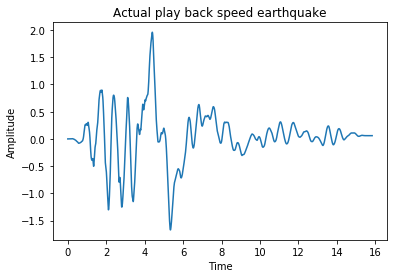

In [35]:

plt.figure()
plt.plot(robot.earthquake.time_interpolated*run_time/robot.earthquake.time_interpolated[-1], robot.earthquake.amplitude_interpolated_scaled*robot.inches_per_step)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Actual play back speed earthquake')
plt.show()

